# Unit 1 Lesson 3
# Intermediate Visualizations Using Seaborn

__Dataset__<br>
Iris dataset offered by Seaborn
found [here](https://github.com/mwaskom/seaborn-data)


In [1]:
#Boilerplate to load necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#Loading an example dataset provided by the seaborn package
iris = sns.load_dataset("iris")

#Setting the overall style of the graphs
sns.set(style="dark")


In [2]:
#Exploring the dataset
print(iris.head(n=5))
print(iris.shape)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


## One Variable plotted four ways (and each single variable plotted and compared)

__Pairplot__
<br>The Pairplot takes a single variable and plots it and plots pairwise relationships in a dataset.
<br>Pros: Fast way to understand the data and relationships within the dataset.
<br>Cons: Not very flexible in use.  Not exactly what was asked for in the assignment, but I learned more.  This dataset is small and to compare one variable 4 ways was not a challenge.


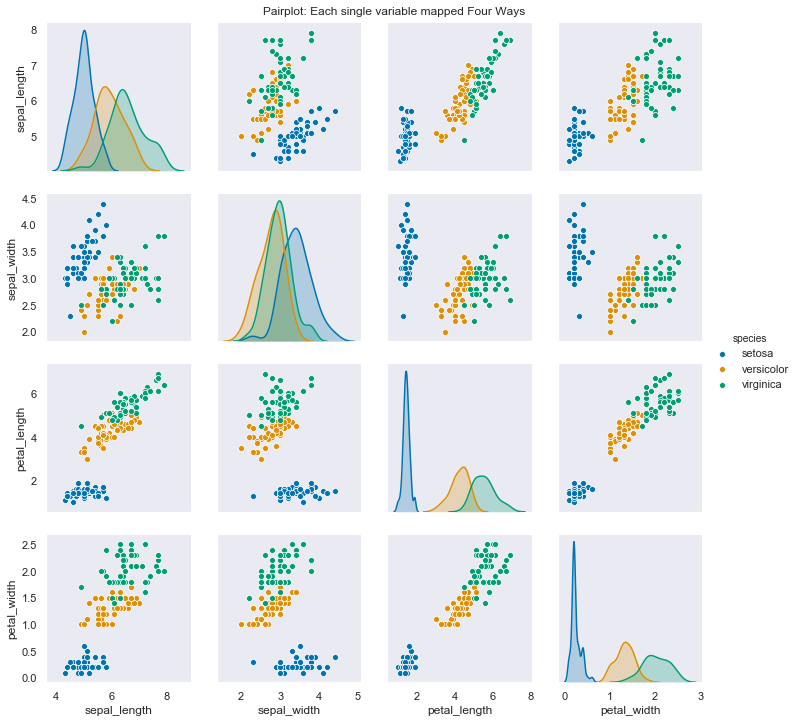

In [3]:
graph = sns.pairplot(iris, hue="species", palette="colorblind")
graph.fig.suptitle("Pairplot: Each single variable mapped Four Ways", y=1)
plt.show()

## Two Continous Variables Plotted 3 Ways

__Scatterplot__
<br>Pros: The scatterplot lends itself to this visualization.  The petal sizes are easily identified as positively related--the larger the petal length corresponds to a larget petal width.
<br> Cons: A large number of datapoint could be overwhelming or noisy making interpretation difficult.

__Lineplot__
<br> Pros: The lineplot is simple and essentially a scatterplot with the datapoints connect with a line.  
<br> Cons: The line is can be distracting.  Usually line graphs are used for time-related comparisons.

__Hexplot__
<br> Pros: It catches the eye because it is different.  It shows the relationship between the two variables as wellas the distribution within each individual variable.
<br> Cons: The relationship between variables is not readily apparent. The dsitribution is not exact--it can offer a "feel" for the data.


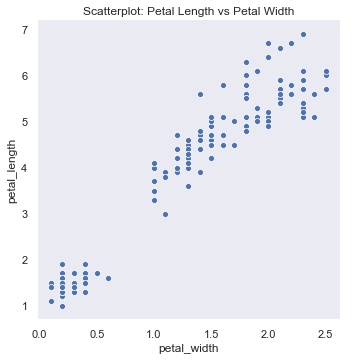

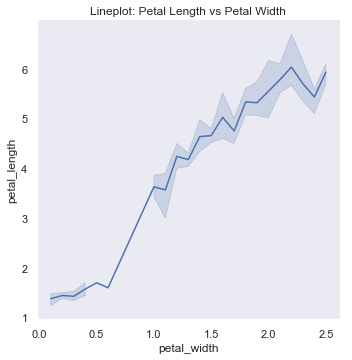

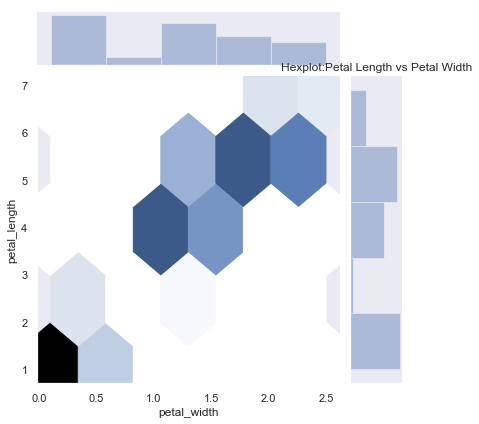

In [4]:
sns.relplot(x="petal_width", y="petal_length", data=iris)
plt.title("Scatterplot: Petal Length vs Petal Width")

sns.relplot(x="petal_width", y="petal_length", data=iris, kind="line")
plt.title("Lineplot: Petal Length vs Petal Width")
plt.show()

sns.jointplot(x="petal_width", y="petal_length", kind="hex", data=iris)
plt.title("Hexplot:Petal Length vs Petal Width")
plt.show()


#sns.relplot(x="petal_width", y="petal_length", hue="species", style="species",data=iris)
plt.show()

## One continious variable and one categorical variable plot 6 ways. (1,2,3)

### 3 Catplots

Below we study the petal length by the individual species.

__Scatterplot (by category) or Catplot__
<br>Pros: Shows the relationship between a numerical value and a category.  Abel to use several categorical variables.
<br> Cons: A large number of datapoints in a single area could be misinterpreted.  Does not show distribution well.

__Stripplot__
<br>Pros: Easily interpreted for smaller observations.  Lends itself to be used with the violinplot. Can be a catplot that is normalized using "jitter."
<br> Cons: It does not scale well to large numbers of observations. 

__Swarmplot__
<br>Pros: Similar to the stipplot, but the points are adjusted along the categorical axis.  This gives better representation of the distribution of values.
<br> Cons: It does not scale well to large numbers of observations.  

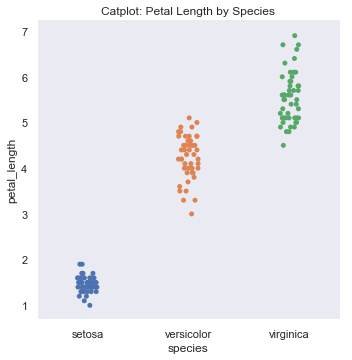

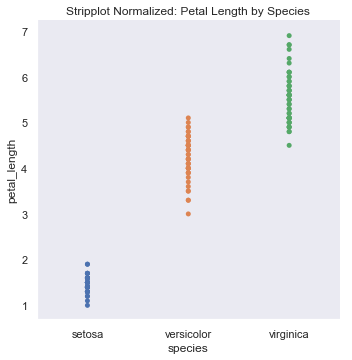

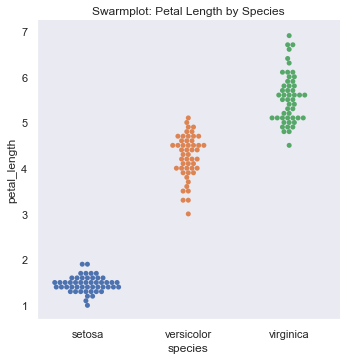

In [5]:
sns.catplot(x='species', y='petal_length', data=iris)
plt.title('Catplot: Petal Length by Species')
plt.show()

sns.catplot(x='species', y='petal_length', jitter=False, data=iris)
plt.title('Stripplot Normalized: Petal Length by Species')
plt.show()

sns.catplot(x='species', y='petal_length', kind='swarm', data=iris)
plt.title('Swarmplot: Petal Length by Species')
plt.show()

## One continious variable and one categorical variable plot 6 ways. (4,5,6)


### Violinplots and the Boxenplots
__Boxplot__
<br>Pros: Shows distribution of data that allows for comparisons across categories.  Shows outliers.
<br>Cons: Sometimes the tails of a distribution may be emphasized and those are the least certain observations in a data set.  The may not fully display the details of a distribution.  (In my reading it was suggested to display a histogram in addition to a boxplot.)

__Violinplot__
<br>Pros: This type of visualization is essentially a boxplot that utilizes the KDE (kernal density estimate).  It can be more informative of the distribution of values.
<br>Cons: However, in my reading, because the violinplot uses a KDE, there are some parameters that may need adjustments and this adds complexity to a relatively simple boxplot.

__Barplot__
<br>Pros: Easily compares categorical data to a continous variable. Bar plots represent the estimate of central tendency. Easily identify trends. 
<br>Cons: Does not fully inform key patterns, causes, assumptions which can mislead in identifying trends correctly.

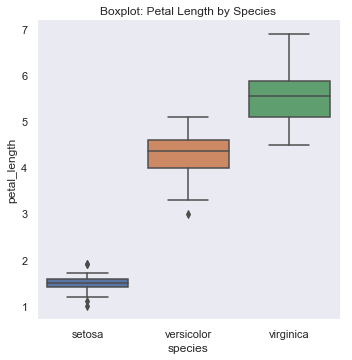

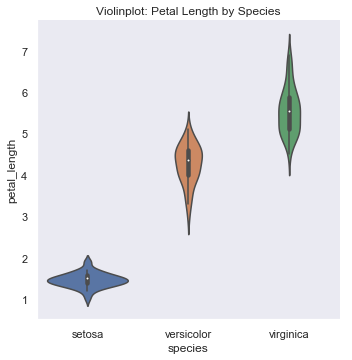

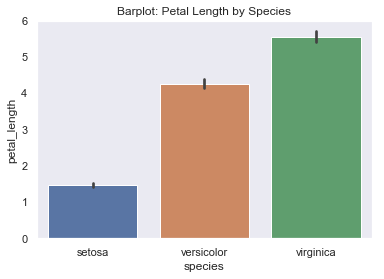

In [6]:
sns.catplot(x='species', y='petal_length', kind="box", data=iris)
plt.title('Boxplot: Petal Length by Species')
plt.show()

sns.catplot(x='species', y='petal_length', kind='violin', data=iris)
plt.title('Violinplot: Petal Length by Species')
plt.show()

sns.barplot(x="species", y="petal_length", data=iris)
plt.title('Barplot: Petal Length by Species')
plt.show()

## Challenge

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.

When you've completed these exercises, share your results with your mentor.



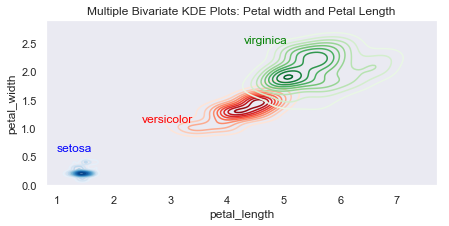

In [45]:
#Subsetting the dataset by each species
setosa = iris.query("species == 'setosa'")
versicolor = iris.query("species == 'versicolor'")
virginica = iris.query("species == 'virginica'")

#Setting up the figure
f, ax = plt. subplots(figsize=(7,7))
ax.set_aspect('equal')

# Drawing the density plots
ax = sns.kdeplot(setosa.petal_length, setosa.petal_width, cmap="Blues", shade=False)
ax = sns.kdeplot(versicolor.petal_length, versicolor.petal_width, cmap="Reds", shade=False)
ax = sns.kdeplot(virginica.petal_length, virginica.petal_width, cmap="Greens", shade=False)


#Labels
ax.text(1.0, 0.6, "setosa", size=12, color="blue")
ax.text(2.5, 1.1,"versicolor", size=12, color="red")
ax.text(4.3, 2.5, "virginica", size=12, color="green")

plt.title("Multiple Bivariate KDE Plots: Petal width and Petal Length")
plt.show()

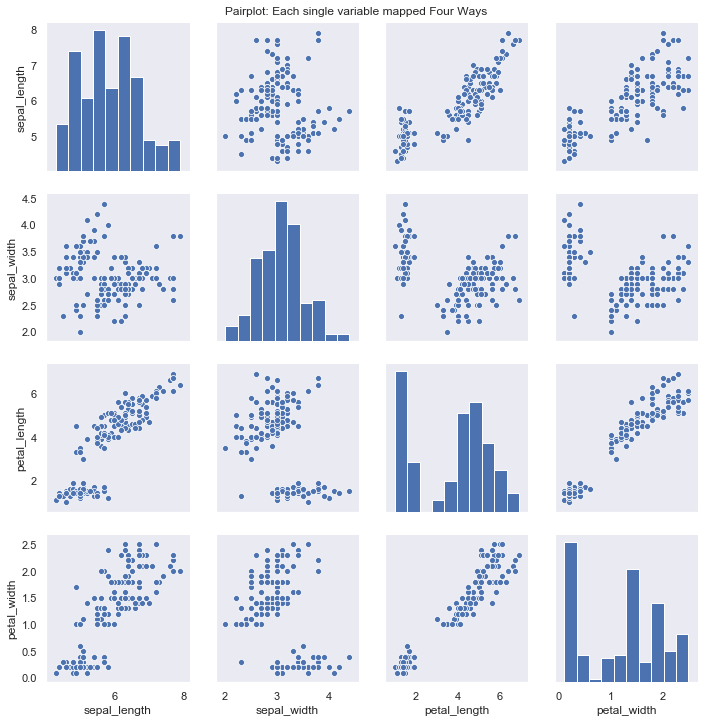

In [47]:
graph = sns.pairplot(iris,)
graph.fig.suptitle("Pairplot: Each single variable mapped Four Ways", y=1)
plt.show()